In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import numpy as np
import ipywidgets

In [4]:
def overlap(p,q):
    """Calculates the difference in overlap."""
    return np.array(abs(p - q)).sum() / (p.sum() + q.sum())

In [72]:
@ipywidgets.interact
def test(popsize=[0,1,2,10,100,10000], n_states=[2,3]):
    omega = []
    for i in range(100):
        true_fname = "results/true-trajectories-{}-{}-{}.pickle".format(
            i,
            popsize, 
            n_states)

        pred_fname = "results/pred-trajectories-{}-{}-{}.pickle".format(
            i,
            popsize, 
            n_states)

        with open(true_fname, "rb") as f:
            true_trajectories = pickle.load(f)

        with open(pred_fname, "rb") as f:
            pred_trajectories = pickle.load(f)


        theta = []
        for ith_move in range(1, 8):
            p, q = [], []
            for traj in pred_trajectories[ith_move]:
                p.append(true_trajectories[ith_move][traj])
                q.append(pred_trajectories[ith_move][traj])
            theta.append(overlap(np.array(p),np.array(q)))

        if len(true_trajectories[7]) > 0:
            omega.append(shannon(true_trajectories))
        else:
            omega.append(0)
        plt.plot(range(1,8)+np.random.randn(7)*.07, theta, 'o', color="gray")

    plt.axis([0,8,-0.05,.4])
    plt.show()

A Jupyter Widget

In [126]:
def shannon(trajectories):
    """"""
    trajectories
    probabilities = np.nan_to_num(np.array(list(true_trajectories[7].values())))
    
    #print(np.count_nonzero(np.isnan(np.log(probabilities))))
    x = np.log(probabilities)
    x[np.isnan(x)] = 0
    integrand = probabilities * x
    integrand[integrand == -np.inf] = 0
    integrand = np.nan_to_num(integrand)

    S = -np.sum(integrand)
    return S

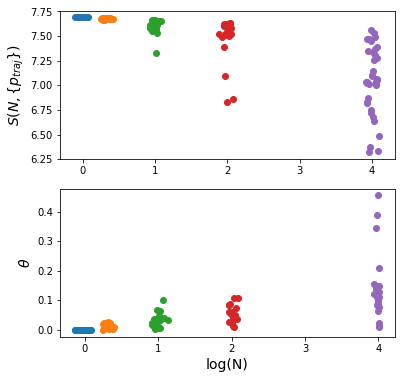

In [179]:
n_states = 3

fig, ax = plt.subplots(2,1, figsize=(6,6))
for j, popsize in enumerate([1,2,10,100,10000]):
    
    theta, omega = [], []
    for i in range(100):
        true_fname = "results/true-trajectories-{}-{}-{}.pickle".format(
            i,
            popsize, 
            n_states)

        pred_fname = "results/pred-trajectories-{}-{}-{}.pickle".format(
            i,
            popsize, 
            n_states)

        with open(true_fname, "rb") as f:
            true_trajectories = pickle.load(f)

        with open(pred_fname, "rb") as f:
            pred_trajectories = pickle.load(f)
            
            
        true_spect = np.array(list(true_trajectories[7].values()))   
        pred_spect = np.array(list(pred_trajectories[7].values()))   

        
        # Quality check
        trajs = np.array(list(true_trajectories[7].values()))
        x = sum(np.nan_to_num(trajs))
        if x < 1.0:
            continue
        elif len(true_trajectories[7]) > 0:
            theta.append( overlap(true_spect, pred_spect) ) 
            omega.append(shannon(trajs))
        else:
            omega.append(0)

    if popsize == 0:
        popsize = 1e10
    x = np.log(popsize)
    
    ax[1].plot(np.log10(popsize * np.ones(len(theta))) + np.random.randn(len(theta))*.05, np.array(theta), 'o', color="C{}".format(j))
    ax[0].plot(np.log10(popsize * np.ones(len(omega))) + np.random.randn(len(omega))*.05, np.array(omega), 'o', color="C{}".format(j))
    
ax[0].set_ylabel("$S(N,\{p_{traj}\})$", fontsize=14)
ax[1].set_ylabel("$\\theta$", fontsize=14)
ax[1].set_xlabel("log(N)",fontsize=14)